<a href="https://colab.research.google.com/github/almaprateek/Rosmann_sales/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [7]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#importing datasets
data_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Tiger project/Project -1 /Retail Sales Pred/Data _ Resources/Rossmann Stores Data.csv'))
store_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Tiger project/Project -1 /Retail Sales Pred/Data _ Resources/store.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


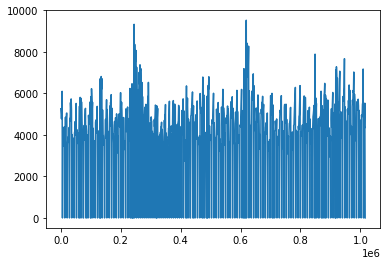

In [13]:
data_df[data_df['Store'] == 1]['Sales'].plot()

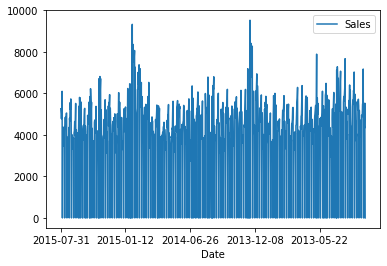

In [14]:
data_df[data_df['Store'] == 1].plot(x= 'Date',y= 'Sales')

In [15]:
# qs - to find out which year has max sales 
data_df['year'] = data_df['Date'].str[0:4]
data_df['year']

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: year, Length: 1017209, dtype: object

In [16]:
data_df.groupby('year').Sales.sum()


year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

In [17]:
data_df['year-month'] = data_df['Date'].str[0:7]
data_df['year-month']

0          2015-07
1          2015-07
2          2015-07
3          2015-07
4          2015-07
            ...   
1017204    2013-01
1017205    2013-01
1017206    2013-01
1017207    2013-01
1017208    2013-01
Name: year-month, Length: 1017209, dtype: object

In [18]:
data_df.groupby('year-month').Sales.sum()

year-month
2013-01    180132207
2013-02    171534275
2013-03    201180369
2013-04    183431432
2013-05    185411063
2013-06    180702351
2013-07    208843882
2013-08    198042727
2013-09    178053963
2013-10    187662330
2013-11    196170924
2013-12    231710561
2014-01    187752787
2014-02    178924677
2014-03    193019854
2014-04    194544977
2014-05    194693257
2014-06    190047051
2014-07    173892707
2014-08    163748475
2014-09    164516168
2014-10    164216398
2014-11    173327953
2014-12    202120592
2015-01    198843730
2015-02    178275458
2015-03    205631683
2015-04    197918886
2015-05    189143897
2015-06    207363373
2015-07    212322616
Name: Sales, dtype: int64

In [19]:
data_df[(data_df['SchoolHoliday'] == 1) & (data_df['StateHoliday'] != 0 )].Sales.mean()

6393.872600291494

In [20]:
data_df.groupby('DayOfWeek').Customers.sum().sort_index

<bound method Series.sort_index of DayOfWeek
1    117675012
2    110848063
3    105117642
4    101732938
5    108384820
6     95103854
7      5179426
Name: Customers, dtype: int64>

In [21]:
data_df['month'] = data_df['Date'].str[5:7]
data_df['month'] = data_df['month'].replace({'01': 'Jan', '02': 'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
data_df['month']

0          Jul
1          Jul
2          Jul
3          Jul
4          Jul
          ... 
1017204    Jan
1017205    Jan
1017206    Jan
1017207    Jan
1017208    Jan
Name: month, Length: 1017209, dtype: object

In [22]:
data_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,year-month,month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,2015-07,Jul
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,2015-07,Jul
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,2015-07,Jul
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,2015-07,Jul
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,2015-07,Jul


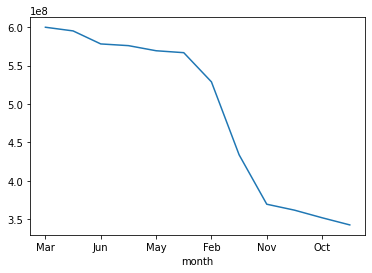

In [30]:
# Let's find out in which month ,sales are highest 
data_df.groupby('month').Sales.sum().sort_values(ascending = False).plot()

# Let's find the effect of competition distance

In [47]:
df1 = data_df.groupby('Store')['Sales'].sum().reset_index()
df1

,Store,Sales
0,1,3716854
1,2,3883858
2,3,5408261
3,4,7556507
4,5,3642818
...,...,...
1110,1111,4091076
1111,1112,7974294
1112,1113,5196242
1113,1114,16202585


In [43]:
df2 = pd.merge(df1,store_df,how = 'inner',left_on = 'Store',right_on = 'Store')
df2

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3716854,440523,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3883858,457855,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5408261,584310,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,7556507,1036254,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3642818,418588,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,4091076,351883,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,7974294,653276,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,5196242,562151,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,16202585,2509542,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


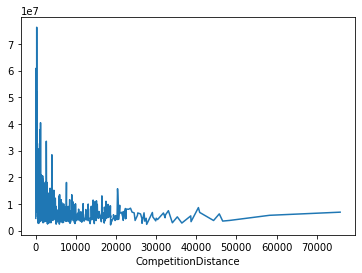

In [50]:
df2.groupby('CompetitionDistance').Sales.sum().plot( )

In [46]:
df3 = pd.merge(data_df,store_df,how = 'inner',left_on = 'Store',right_on = 'Store')
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,Jul,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,Jul,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,Jul,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,Jul,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,Jul,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,Jan,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,Jan,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,Jan,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,Jan,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Effect of promo 2

In [51]:
df3.groupby('Promo2')['Sales','Customers'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Customers
Promo2,,
0,3111542628,357125490
1,2761637995,286916265


## Insight  - It seems like promo2 doesn't work well for the businness as the no of sales and customers decreases .

# Which store drives the most customers??

In [58]:
df3.groupby("StoreType").agg({"Customers":["mean","sum"]})

Customers           
                  mean        sum
StoreType                        
a           659.034880  363541434
b          1987.720846   31465621
c           673.265894   92129705
d           501.434892  156904995